This notebook reproduces 

> **Fig 11**: Stark states of $n=30$ and 31 states of Ps, with $m=2$ (grey dashed) and $m=29$ (black). In the $n=30$ level, the $m=29$ state is a circular state and experiences no first-order Stark shift and only a very weak second-order shift, as explained in the text.

from the article

> #### Prospects for Studies of the Free Fall and Gravitational Quantum States of Antimatter
>
> G. Dufour, D. B. Cassidy, P. Crivelli, P. Debu, A. Lambrecht, V. V. Nesvizhevsky, S. Reynaud, A. Yu. Voronin, and T. E. Wall.
>
> *Adv. High En. Phys.*, **2015**, 379642 (2015) [DOI:10.1155/2015/379642](https://dx.doi.org/10.1155/2015/379642)

This article uses an $|\, n \, l \, m_l \, \rangle$ basis and plots the Stark structure for $m_l=2$ and $m_l=29$.

The calculation below uses an $|\, n \, l \, S \, J \, M_J \, \rangle$ basis with $S=0$ and plots Stark structure for $M_J = 2$ and $M_J=29$.

In [1]:
# packages
import os
from functools import reduce
from hsfs import Hamiltonian, En_h, h, c, constants_info, mu_me
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['axes.formatter.useoffset'] = False

# Parallel fields, $n=20-21$

In [9]:
# construct matrix
n_min = 20
n_max = 21
S = None
mat0 = Hamiltonian(n_min=n_min, n_max=n_max, S=S, MJ_max=2)
print('Number of basis states:', '%d'%mat0.num_states)

Number of basis states: 768


In [10]:
# calculate Stark map
Bfield=0.1
Efield_vec=[0.0,0.0,1.0]
stark_method='6j'
Efield = np.linspace(4.5*10**2, 6.0*10**2, 101) # V /cm
sm0 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec, 
                     stark_method=stark_method,
                     singlet_triplet_coupling=False,
                     cache_matrices=True,
                     load_matrices=True,
                     save_matrices=True,
                     matrices_dir='./saved_matrices/')
sm1 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec, 
                     stark_method=stark_method,
                     singlet_triplet_coupling=True,
                     cache_matrices=True,
                     load_matrices=True,
                     save_matrices=True,
                     matrices_dir='./saved_matrices/')

calculate Zeeman terms:   2%|▏         | 15/768 [00:00<00:05, 139.08it/s]

Using field orientation: parallel


calculate Stark terms:   1%|          | 6/768 [00:00<00:15, 49.72it/s]

Saved zeeman matrix as, 
	 ./saved_matrices/zeeman_n=20-21_l_max=None_S=None_MJ=None_MJ_max=2
H_Z sum:  -0.00021669138653


diagonalise Hamiltonian:   2%|▏         | 2/101 [00:00<00:06, 14.46it/s]

Saved stark matrix as, 
	 ./saved_matrices/stark_n=20-21_l_max=None_S=None_MJ=None_MJ_max=2_parallel
mat_s sum:  414353.857062


calculate singlet-triplet coupling terms:   5%|▍         | 38/768 [00:00<00:01, 374.37it/s]

Using field orientation: parallel
Using cached Zeeman matrix
H_Z sum:  -0.00021669138653


diagonalise Hamiltonian:   2%|▏         | 2/101 [00:00<00:05, 16.95it/s]

H_spin sum:  -2.09766980406e-06
Using cached Stark matrix
mat_s sum:  414353.857062


diagonalise Hamiltonian: 100%|██████████| 101/101 [00:05<00:00, 18.22it/s]


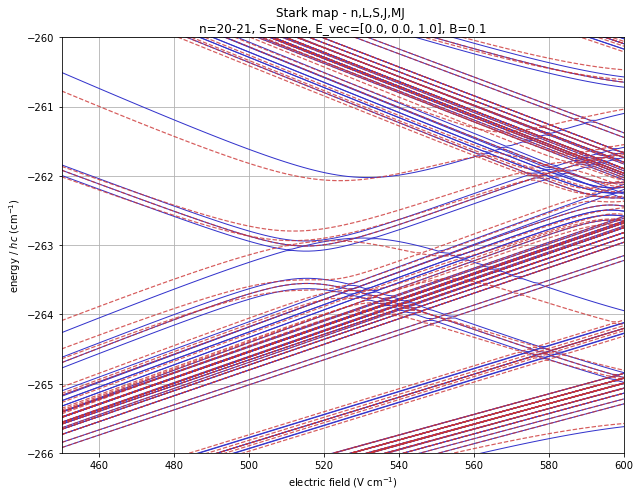

In [11]:
fig, ax = plt.subplots(figsize=(9, 7))

# plot
#MJ = 0
indexes = range(mat0.num_states)
#indexes = mat0.where('J', 11)
for ix in indexes:
    ax.plot(Efield, sm0[:, ix] / (100*h*c*mu_me), ls='-', lw=1.0, alpha=1, c=(0.2, 0.2, 0.8))
#MJ = 1
indexes = range(mat0.num_states)
for ix in indexes:
    ax.plot(Efield, sm1[:, ix] / (100*h*c*mu_me), ls='--', lw=1.2, alpha=0.8, c=(0.8, 0.2, 0.2))

# format
ax.set_xlabel('electric field (V cm$^{-1}$)')
ax.set_ylabel('energy / $h c$ (cm$^{-1}$)')
ax.set_xlim(450, 600)
ax.set_ylim(-266, -260)

# output
plt.grid()
plt.title('Stark map - n,L,S,J,MJ \n' + \
          'n='+str(n_min)+'-'+str(n_max)+ ', ' + \
          'S=' + str(S) + ', ' + \
          'E_vec='+str(Efield_vec) + ', ' + \
          'B='+str(Bfield))
plt.tight_layout()

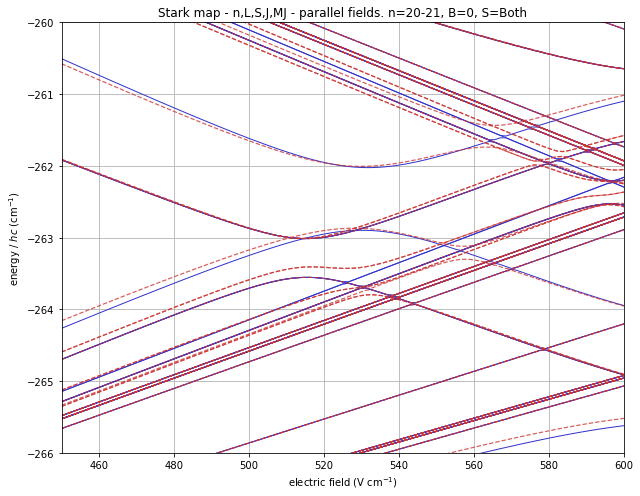

# Parallel fields, $n=5-6$

In [2]:
# construct matrix
n_min = 5
n_max = 6
S = None
mat0 = Hamiltonian(n_min=n_min, n_max=n_max, S=S, MJ_max=None)
print('Number of basis states:', '%d'%mat0.num_states)

Number of basis states: 244


In [3]:
# calculate Stark map
Bfield=10.0
Efield_vec=[0.0,0.0,1.0]
stark_method='6j'
zeeman_method='hsfs'
Efield = np.linspace(3.5*10**5, 6.0*10**5, 501) # V /cm
sm0 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec,
                     stark_method=stark_method,
                     zeeman_method=zeeman_method)
sm1 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec,
                     stark_method=stark_method,
                     zeeman_method=zeeman_method,
                     singlet_triplet_coupling=True)

calculate Zeeman terms:   6%|▌         | 15/244 [00:00<00:01, 132.06it/s]

Using field orientation: parallel


calculate Stark terms:   0%|          | 0/244 [00:00<?, ?it/s]

H_Z sum:  -0.00460364391642


diagonalise Hamiltonian:   3%|▎         | 15/501 [00:00<00:03, 146.99it/s]

mat_s sum:  5787.42494082


calculate Zeeman terms:  10%|▉         | 24/244 [00:00<00:00, 233.72it/s]

Using field orientation: parallel


calculate Stark terms:   0%|          | 0/244 [00:00<?, ?it/s]

H_Z sum:  -0.00460364391642
H_spin sum:  -0.00179180954525


diagonalise Hamiltonian:   5%|▌         | 26/501 [00:00<00:01, 252.67it/s]

mat_s sum:  5787.42494082


diagonalise Hamiltonian: 100%|██████████| 501/501 [00:01<00:00, 295.92it/s]


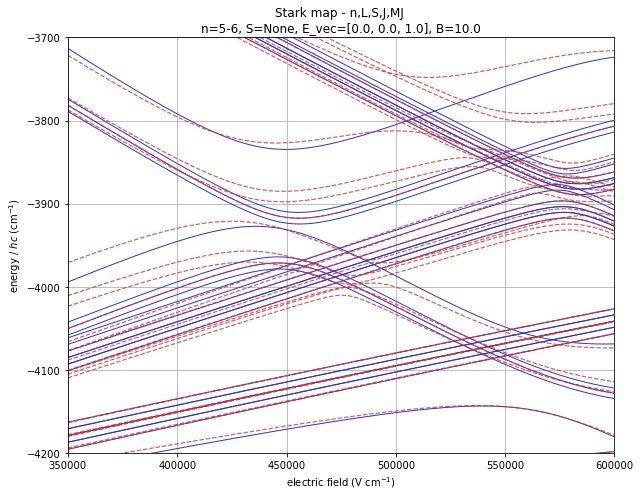

In [5]:
fig, ax = plt.subplots(figsize=(9, 7))

# plot
#MJ = 0
indexes = range(mat0.num_states)
#indexes = [i for i, state in enumerate(mat0.basis) if state.L==state.J]
#indexes = mat0.where('J', 11)
for ix in indexes:
    ax.plot(Efield, sm0[:, ix] / (100*h*c*mu_me), ls='-', lw=1.0, alpha=1, c=(0.2, 0.2, 0.8))
#MJ = 1
#
indexes = range(mat0.num_states)
for ix in indexes:
    ax.plot(Efield, sm1[:, ix] / (100*h*c*mu_me), ls='--', lw=1.2, alpha=0.8, c=(0.8, 0.2, 0.2))

# format
ax.set_xlabel('electric field (V cm$^{-1}$)')
ax.set_ylabel('energy / $h c$ (cm$^{-1}$)')
ax.set_xlim(350000, 600000)
ax.set_ylim(-4200, -3700)

# output
plt.grid()
plt.title('Stark map - n,L,S,J,MJ \n' + \
          'n='+str(n_min)+'-'+str(n_max)+ ', ' + \
          'S=' + str(S) + ', ' + \
          'E_vec='+str(Efield_vec) + ', ' + \
          'B='+str(Bfield))
plt.tight_layout()

### Comapre Wigner-3J and Wigner-6J

In [6]:
# construct matrix
n_min = 5
n_max = 6
S = None
mat0 = Hamiltonian(n_min=n_min, n_max=n_max, S=S, MJ_max=None)
print('Number of basis states:', '%d'%mat0.num_states)
mat1 = Hamiltonian(n_min=n_min, n_max=n_max, S=S, MJ_max=None)
print('Number of basis states:', '%d'%mat1.num_states)

Number of basis states: 244
Number of basis states: 244


In [7]:
# calculate Stark map
Bfield=0.0
Efield_vec=[0.0,0.0,1.0]
stark_method='3j'
zeeman_method='hsfs'
Efield = np.linspace(3.5*10**5, 6.0*10**5, 501) # V /cm
sm0 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec,
                     stark_method=stark_method,
                     zeeman_method=zeeman_method)
sm1 = mat1.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec,
                     stark_method=stark_method,
                     zeeman_method=zeeman_method,
                     singlet_triplet_coupling=True)

# calculate Stark map
Bfield=0.0
Efield_vec=[0.0,0.0,1.0]
stark_method='6j'
zeeman_method='hsfs'
Efield = np.linspace(3.5*10**5, 6.0*10**5, 501) # V /cm
sm2 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec,
                     stark_method=stark_method,
                     zeeman_method=zeeman_method)
sm3 = mat1.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec,
                     stark_method=stark_method,
                     zeeman_method=zeeman_method,
                     singlet_triplet_coupling=True)

calculate Stark terms:   2%|▏         | 6/244 [00:00<00:04, 58.52it/s]

Using field orientation: parallel


diagonalise Hamiltonian:   6%|▌         | 30/501 [00:00<00:01, 299.67it/s]

mat_s sum:  87.2954251885


calculate singlet-triplet coupling terms:  25%|██▍       | 60/244 [00:00<00:00, 599.91it/s]

Using field orientation: parallel


calculate Stark terms:   2%|▏         | 6/244 [00:00<00:04, 54.46it/s]

H_spin sum:  -0.00179180954525


diagonalise Hamiltonian:   1%|▏         | 7/501 [00:00<00:07, 69.71it/s]

mat_s sum:  87.2954251885


calculate Stark terms:   2%|▏         | 5/244 [00:00<00:04, 48.01it/s]

Using field orientation: parallel


diagonalise Hamiltonian:   3%|▎         | 14/501 [00:00<00:03, 135.93it/s]

mat_s sum:  5787.42494082


calculate singlet-triplet coupling terms:  26%|██▌       | 64/244 [00:00<00:00, 629.58it/s]

Using field orientation: parallel


calculate Stark terms:   2%|▏         | 6/244 [00:00<00:04, 52.60it/s]

H_spin sum:  -0.00179180954525


diagonalise Hamiltonian:   4%|▎         | 18/501 [00:00<00:02, 179.49it/s]

mat_s sum:  5787.42494082


diagonalise Hamiltonian: 100%|██████████| 501/501 [00:02<00:00, 195.57it/s]


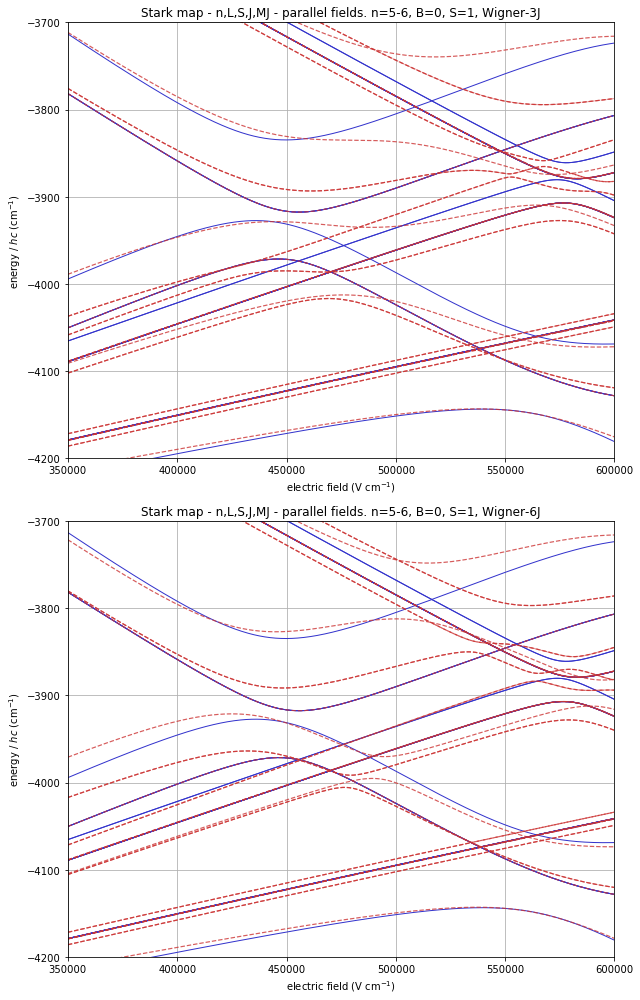

In [8]:
plt.figure(figsize=(9, 14))
plt.subplot(2,1,1)

# plot
#MJ = 0
indexes = range(mat0.num_states)
#indexes = [i for i, state in enumerate(mat0.basis) if state.L==state.J]
#indexes = mat0.where('J', 11)
for ix in indexes:
    plt.plot(Efield, sm0[:, ix] / (100*h*c*mu_me), ls='-', lw=1.0, alpha=1, c=(0.2, 0.2, 0.8))
#MJ = 1
#
indexes = range(mat1.num_states)
for ix in indexes:
    plt.plot(Efield, sm1[:, ix] / (100*h*c*mu_me), ls='--', lw=1.2, alpha=0.8, c=(0.8, 0.2, 0.2))

# format
plt.xlabel('electric field (V cm$^{-1}$)')
plt.ylabel('energy / $h c$ (cm$^{-1}$)')
plt.xlim(350000,600000)
plt.ylim(-4200, -3700)

# output
plt.grid()
plt.title('Stark map - n,L,S,J,MJ - parallel fields. n=5-6, B=0, S=1, Wigner-3J')
plt.tight_layout()

plt.subplot(2,1,2)

# plot
#MJ = 0
indexes = range(mat0.num_states)
#indexes = [i for i, state in enumerate(mat0.basis) if state.L==state.J]
#indexes = mat0.where('J', 11)
for ix in indexes:
    plt.plot(Efield, sm2[:, ix] / (100*h*c*mu_me), ls='-', lw=1.0, alpha=1, c=(0.2, 0.2, 0.8))
#MJ = 1
#
indexes = range(mat1.num_states)
for ix in indexes:
    plt.plot(Efield, sm3[:, ix] / (100*h*c*mu_me), ls='--', lw=1.2, alpha=0.8, c=(0.8, 0.2, 0.2))

# format
plt.xlabel('electric field (V cm$^{-1}$)')
plt.ylabel('energy / $h c$ (cm$^{-1}$)')
plt.xlim(350000, 600000)
plt.ylim(-4200, -3700)

# output
plt.grid()
plt.title('Stark map - n,L,S,J,MJ - parallel fields. n=5-6, B=0, S=1, Wigner-6J')
plt.tight_layout()

In [6]:
constants_info()

,Constant,Value
0,"speed of light in vacuum, $c$",299792458
1,"Planks constant, $h$",6.62607004e-34
2,"Reduced Planks constant, $\hbar$",1.0545718e-34
3,"Rydberg constant, $R_{\infty}$",10973731.568508
4,"electron charge, $e$",1.6021766208e-19
5,fine structure constant,0.0072973525664
6,atomic mass,1.66053904e-27
7,Hatree energy,4.3597446510117e-18
8,"Bohr radius, $a_0$",5.2917721048e-11
9,"Bohr magneton, $\mu_B$",9.2740099908307e-24
